In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [12]:
#loading the file
price_df = pd.read_csv("C:/Users/zhaoy/Documents/ECON_611_Uniper_Project/ECON-611-Uniper-Project/data/price_weather.csv", encoding='ISO-8859-1')

In [13]:
price_df.head()

,Date,Day,Henry USD/MMBtu,AECO 5A USD/MMBtu,AECO 5A Cad/GJ,Township,Air Temp. Min. (°C),Air Temp. Max. (°C),Precip. (mm),Wind Speed 10 m Avg. (km/h),Township.1,Air Temp. Min. (°C).1,Air Temp. Max. (°C).1,Precip. (mm).1,Wind Speed 10 m Avg. (km/h).1
0,1/1/2018,Monday,3.580,2.8248,3.3518,T024R01W5,-30.01,-3.27,0.1,8.96,T052R24W4,-27.85,-6.67,0.0,8.62
1,1/2/2018,Tuesday,3.580,1.7509,2.0754,T024R01W5,-10.32,0.97,0.0,8.22,T052R24W4,-7.73,2.87,0.0,7.03
2,1/3/2018,Wednesday,6.625,1.5555,1.8480,T024R01W5,-8.65,5.24,0.0,6.40,T052R24W4,-8.36,3.22,0.0,6.48
3,1/4/2018,Thursday,6.875,1.5478,1.8377,T024R01W5,-10.72,2.90,0.0,5.45,T052R24W4,-7.16,1.85,0.0,5.10
4,1/5/2018,Friday,4.420,1.3134,1.5431,T024R01W5,-10.51,8.97,0.0,9.45,T052R24W4,-9.86,-3.00,0.0,6.83


### Data Cleaning

In [14]:
# Check for unique values that might not be dates
print(price_df['Date'].unique())


['1/1/2018' '1/2/2018' '1/3/2018' ... '12/30/2023' '12/31/2023' nan]


In [15]:
import holidays

# Create an instance of the holidays class for Canada
ca_holidays = holidays.Canada(subdiv='AB')

# Convert the 'Date' column to datetime format (if not already)
price_df['Date'] = pd.to_datetime(price_df['Date'], errors='coerce')
price_df = price_df.dropna(subset=['Date'])

# Add a new column to mark public holidays
def is_holiday(date, holiday_list):
    try:
        return date in holiday_list
    except:
        return False

price_df['Is_Public_Holiday'] = price_df['Date'].apply(lambda x: is_holiday(x, ca_holidays))

# Filter out the rows where 'Is_Public_Holiday' is True
new_price_df = price_df[~price_df['Is_Public_Holiday']]

In [16]:
new_price_df.head()

,Date,Day,Henry USD/MMBtu,AECO 5A USD/MMBtu,AECO 5A Cad/GJ,Township,Air Temp. Min. (°C),Air Temp. Max. (°C),Precip. (mm),Wind Speed 10 m Avg. (km/h),Township.1,Air Temp. Min. (°C).1,Air Temp. Max. (°C).1,Precip. (mm).1,Wind Speed 10 m Avg. (km/h).1,Is_Public_Holiday
1,2018-01-02,Tuesday,3.580,1.7509,2.0754,T024R01W5,-10.32,0.97,0.0,8.22,T052R24W4,-7.73,2.87,0.0,7.03,False
2,2018-01-03,Wednesday,6.625,1.5555,1.8480,T024R01W5,-8.65,5.24,0.0,6.40,T052R24W4,-8.36,3.22,0.0,6.48,False
3,2018-01-04,Thursday,6.875,1.5478,1.8377,T024R01W5,-10.72,2.90,0.0,5.45,T052R24W4,-7.16,1.85,0.0,5.10,False
4,2018-01-05,Friday,4.420,1.3134,1.5431,T024R01W5,-10.51,8.97,0.0,9.45,T052R24W4,-9.86,-3.00,0.0,6.83,False
5,2018-01-06,Saturday,2.900,1.3134,1.5431,T024R01W5,-2.89,8.18,0.0,16.27,T052R24W4,-9.57,4.86,0.0,8.02,False


In [17]:
#price_df.describe

In [18]:
# Filter out the weekends
# datetime.weekday() returns 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
new_price_df = new_price_df[new_price_df['Date'].dt.weekday < 5]

In [19]:
new_price_df.head()

,Date,Day,Henry USD/MMBtu,AECO 5A USD/MMBtu,AECO 5A Cad/GJ,Township,Air Temp. Min. (°C),Air Temp. Max. (°C),Precip. (mm),Wind Speed 10 m Avg. (km/h),Township.1,Air Temp. Min. (°C).1,Air Temp. Max. (°C).1,Precip. (mm).1,Wind Speed 10 m Avg. (km/h).1,Is_Public_Holiday
1,2018-01-02,Tuesday,3.580,1.7509,2.0754,T024R01W5,-10.32,0.97,0.0,8.22,T052R24W4,-7.73,2.87,0.0,7.03,False
2,2018-01-03,Wednesday,6.625,1.5555,1.8480,T024R01W5,-8.65,5.24,0.0,6.40,T052R24W4,-8.36,3.22,0.0,6.48,False
3,2018-01-04,Thursday,6.875,1.5478,1.8377,T024R01W5,-10.72,2.90,0.0,5.45,T052R24W4,-7.16,1.85,0.0,5.10,False
4,2018-01-05,Friday,4.420,1.3134,1.5431,T024R01W5,-10.51,8.97,0.0,9.45,T052R24W4,-9.86,-3.00,0.0,6.83,False
7,2018-01-08,Monday,2.900,1.2697,1.4953,T024R01W5,-4.56,8.00,0.0,8.17,T052R24W4,-8.61,-0.70,0.0,7.58,False


In [20]:
#new_price_df.describe

In [21]:
new_price_df.columns

Index(['Date', 'Day', 'Henry USD/MMBtu', 'AECO 5A USD/MMBtu', 'AECO 5A Cad/GJ',
       'Township', 'Air Temp. Min. (°C)', 'Air Temp. Max. (°C)',
       'Precip. (mm)', 'Wind Speed 10 m Avg. (km/h)', 'Township.1',
       'Air Temp. Min. (°C).1', 'Air Temp. Max. (°C).1', 'Precip. (mm).1',
       'Wind Speed 10 m Avg. (km/h).1', 'Is_Public_Holiday'],
      dtype='object')

In [22]:
# Verifying data types
new_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1512 entries, 1 to 2188
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           1512 non-null   datetime64[ns]
 1   Day                            1512 non-null   object        
 2   Henry USD/MMBtu                1512 non-null   float64       
 3   AECO 5A USD/MMBtu              1512 non-null   float64       
 4   AECO 5A Cad/GJ                 1512 non-null   float64       
 5   Township                       1512 non-null   object        
 6   Air Temp. Min. (°C)            1512 non-null   float64       
 7   Air Temp. Max. (°C)            1512 non-null   float64       
 8   Precip. (mm)                   1512 non-null   float64       
 9   Wind Speed 10 m Avg. (km/h)    1512 non-null   float64       
 10  Township.1                     1512 non-null   object        
 11  Air Temp. Min. (°

### Exploratory Data Analysis

In [23]:
# Summary statistics
summary_stats = new_price_df.describe()
summary_stats

,Henry USD/MMBtu,AECO 5A USD/MMBtu,AECO 5A Cad/GJ,Air Temp. Min. (°C),Air Temp. Max. (°C),Precip. (mm),Wind Speed 10 m Avg. (km/h),Air Temp. Min. (°C).1,Air Temp. Max. (°C).1,Precip. (mm).1,Wind Speed 10 m Avg. (km/h).1
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,3.408072,2.201248,2.719267,-1.417388,10.913069,0.950794,12.530615,-1.038909,9.957381,1.124901,10.164947
std,1.815843,1.295148,1.569372,10.448357,12.197683,3.372606,4.666317,11.622743,13.056536,3.771274,3.962684
min,1.335000,-0.151700,-0.188400,-33.410000,-28.450000,0.000000,2.770000,-37.610000,-29.900000,0.000000,2.190000
25%,2.360000,1.434575,1.829125,-7.970000,3.195000,0.000000,9.270000,-8.932500,1.127500,0.000000,7.350000
50%,2.745000,1.932200,2.428050,-0.585000,11.585000,0.000000,11.625000,-0.405000,10.790000,0.000000,9.340000
75%,3.881250,2.661225,3.208975,7.275000,20.577500,0.280000,14.812500,8.917500,20.832500,0.390000,12.235000
max,23.605000,6.845300,8.315900,18.340000,36.580000,48.540000,41.510000,22.310000,37.260000,37.470000,32.450000


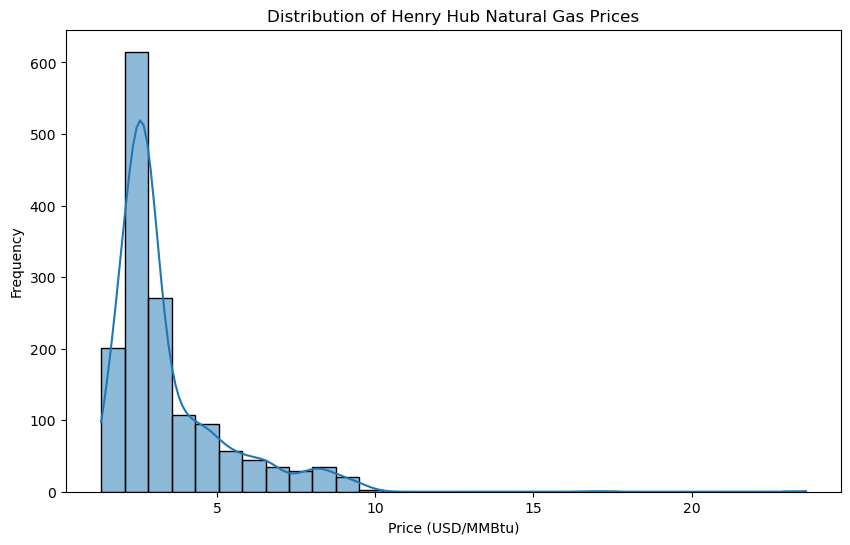

In [24]:
# Distribution of variables
# Histogram for Gas Prices
plt.figure(figsize=(10, 6))
sns.histplot(new_price_df['Henry USD/MMBtu'], bins=30, kde=True)
plt.title('Distribution of Henry Hub Natural Gas Prices')
plt.xlabel('Price (USD/MMBtu)')
plt.ylabel('Frequency')
plt.show()


In [41]:
# Log transformation of 'Henry USD/MMBtu'
new_price_df['Log_Henry_USD_MMBtu'] = np.log(new_price_df['Henry USD/MMBtu'])

# Log transformation of 'AECO 5A USD/MMBtu'
new_price_df['Log_AECO_5A_USD_MMBtu'] = np.log(new_price_df['AECO 5A USD/MMBtu'])

# Log transformation of 'AECO 5A Cad/GJ'
new_price_df['Log_AECO_5A_Cad_GJ'] = np.log(new_price_df['AECO 5A Cad/GJ'])


C:\Users\zhaoy\anaconda3\envs\tf2\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


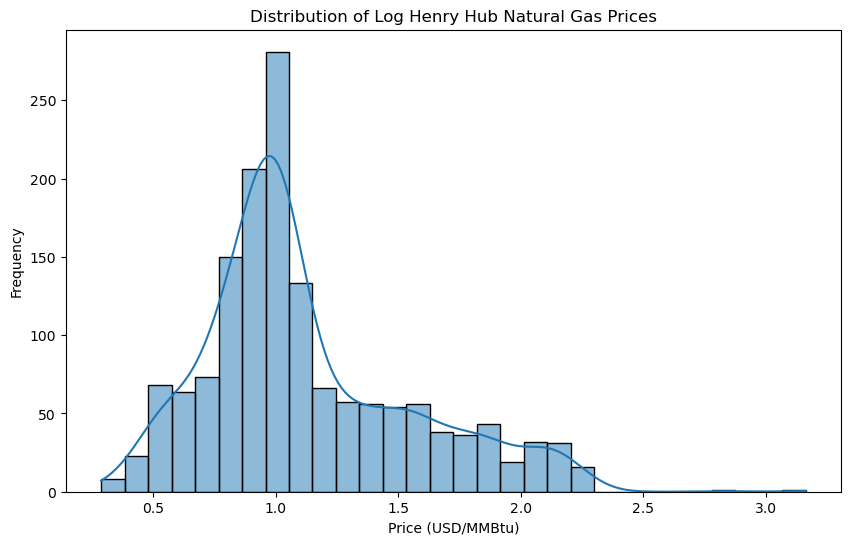

In [42]:
# Distribution of variables
# Histogram for Log Gas Prices
plt.figure(figsize=(10, 6))
sns.histplot(new_price_df['Log_Henry_USD_MMBtu'], bins=30, kde=True)
plt.title('Distribution of Log Henry Hub Natural Gas Prices')
plt.xlabel('Price (USD/MMBtu)')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Create temperature bins and labels
temp_bins = [-float('inf'), 0, 15, float('inf')]
temp_labels = ['cold', 'mild', 'hot']

# Create a new column for the temperature category
new_price_df['Temp_Category'] = pd.cut(new_price_df['Air Temp. Max. (°C)'], bins=temp_bins, labels=temp_labels)

In [26]:
# Example: Count the occurrences of each category in 'Temp_Category' column
temp_category_counts = new_price_df['Temp_Category'].value_counts()

# Retrieve the count for "hot"
hot_count = temp_category_counts.get('hot', 0)
mild_count = temp_category_counts.get('mild', 0)
cold_count = temp_category_counts.get('cold', 0)

# Print the count
print(f"Number of 'hot' days: {hot_count}")
print(f"Number of 'mild' days: {mild_count}")
print(f"Number of 'cold' days: {cold_count}")

Number of 'hot' days: 623
Number of 'mild' days: 629
Number of 'cold' days: 260


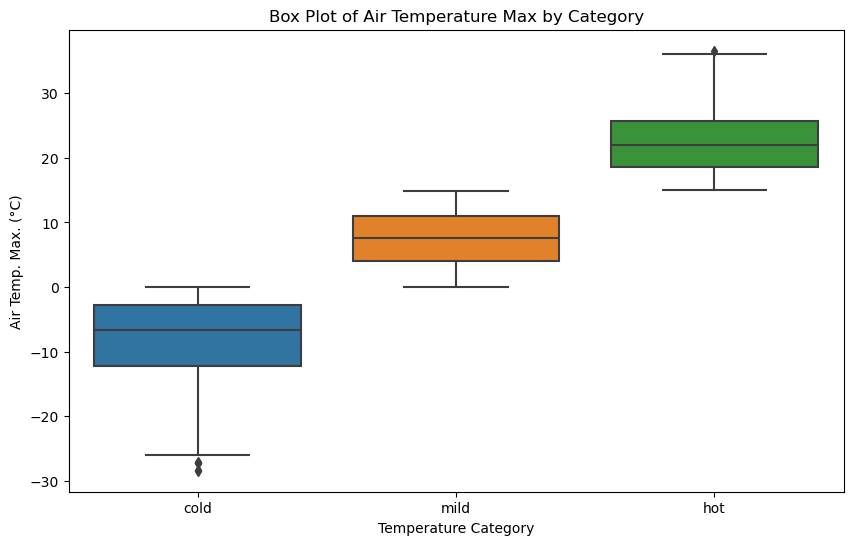

In [27]:
# Box plot for temperature
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_price_df, x='Temp_Category', y='Air Temp. Max. (°C)')
plt.title('Box Plot of Air Temperature Max by Category')
plt.xlabel('Temperature Category')
plt.ylabel('Air Temp. Max. (°C)')
plt.show()

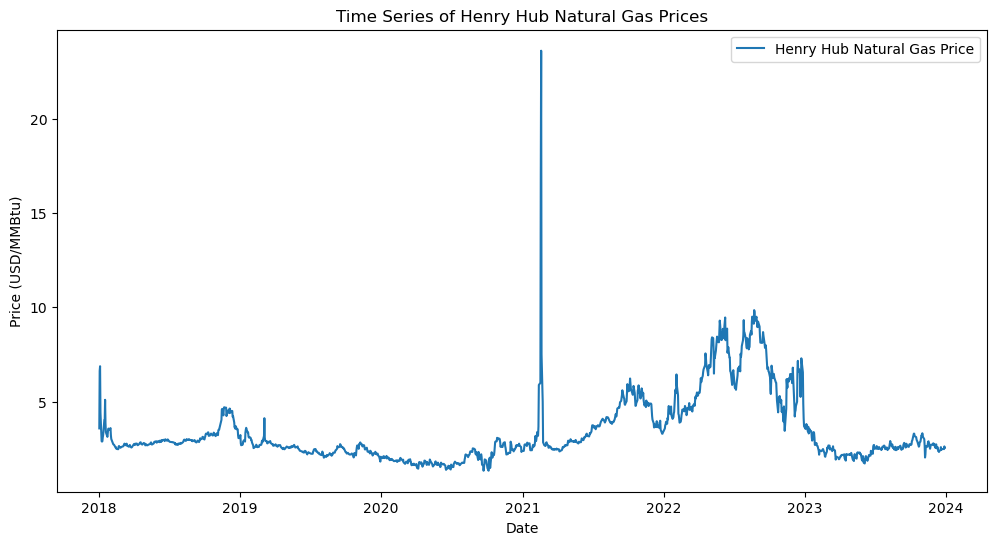

In [39]:
# Visualize time series

# Setting Date as index for time series plotting
time_series_df = new_price_df.set_index('Date')

# Plotting Henry Gas Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['Henry USD/MMBtu'], label='Henry Hub Natural Gas Price')
plt.title('Time Series of Henry Hub Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD/MMBtu)')
plt.legend()
plt.show()


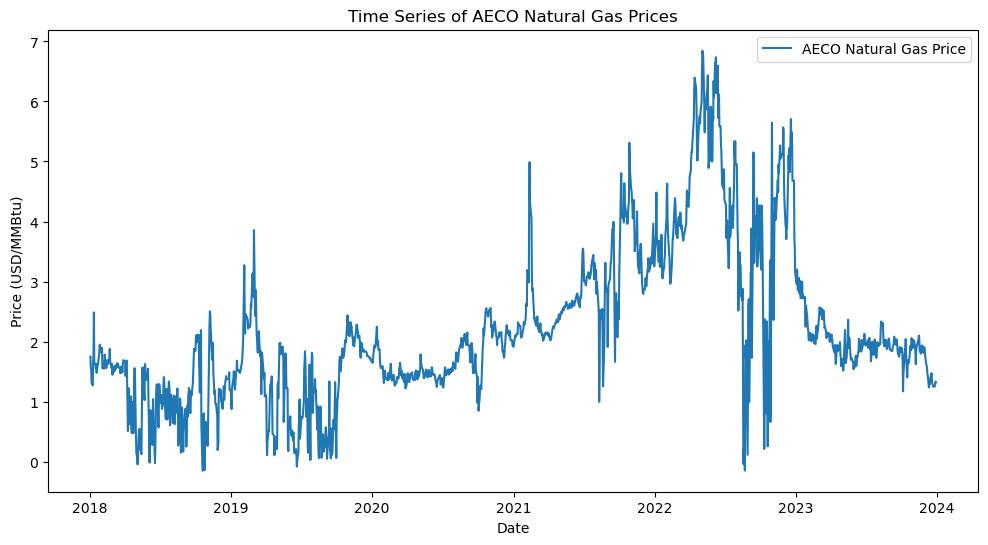

In [40]:
# Visualize time series

# Setting Date as index for time series plotting
time_series_df = new_price_df.set_index('Date')

# Plotting AECO Gas Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['AECO 5A USD/MMBtu'], label='AECO Natural Gas Price')
plt.title('Time Series of AECO Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD/MMBtu)')
plt.legend()
plt.show()

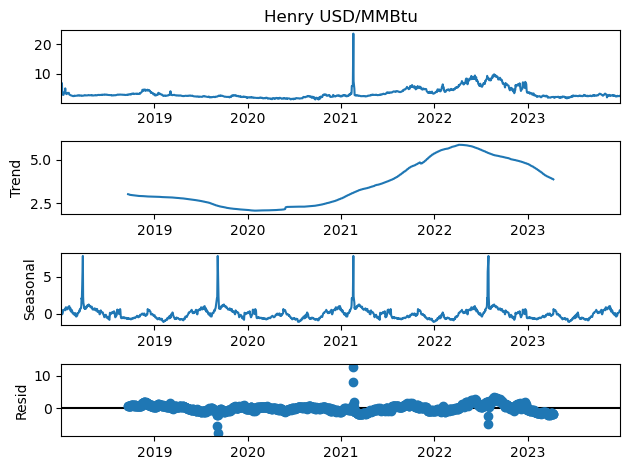

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the gas price time series
decomposition = seasonal_decompose(time_series_df['Henry USD/MMBtu'], model='additive', period=365)

# Plotting the decomposed components
decomposition.plot()
plt.show()

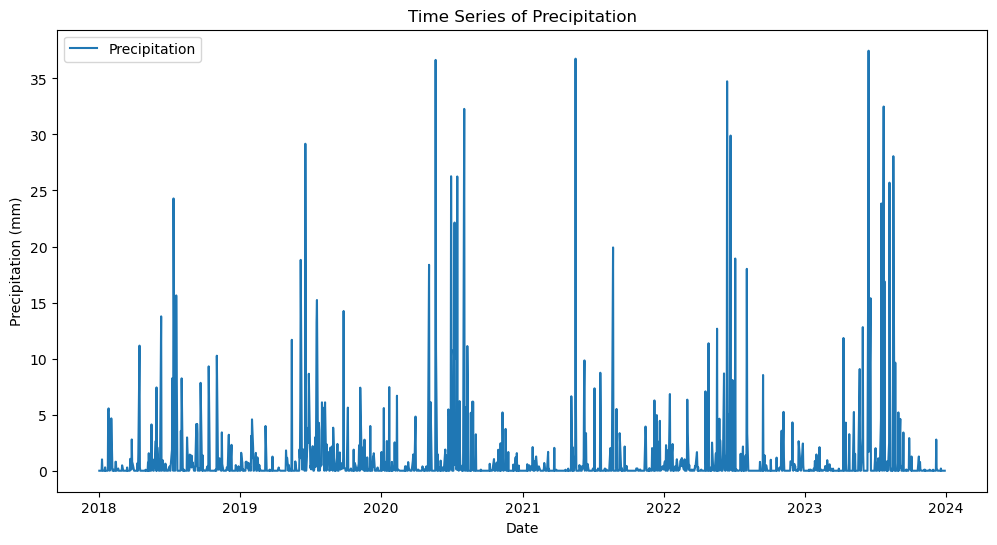

In [30]:
# Plotting precipitation over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_df['Precip. (mm).1'], label='Precipitation')
plt.title('Time Series of Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [31]:
# Function to map month to season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

# Extract the month from the date
new_price_df['Month'] = new_price_df['Date'].dt.month

# Create the 'Season' column
new_price_df['Season'] = new_price_df['Month'].apply(get_season)


In [46]:
# Calculate average temperature
new_price_df['Avg_Temp_C'] = (new_price_df['Air Temp. Min. (°C)'] + new_price_df['Air Temp. Max. (°C)']) / 2
new_price_df['Avg_Temp_C.1'] = (new_price_df['Air Temp. Min. (°C).1'] + new_price_df['Air Temp. Max. (°C).1']) / 2

### Correlation Analysis

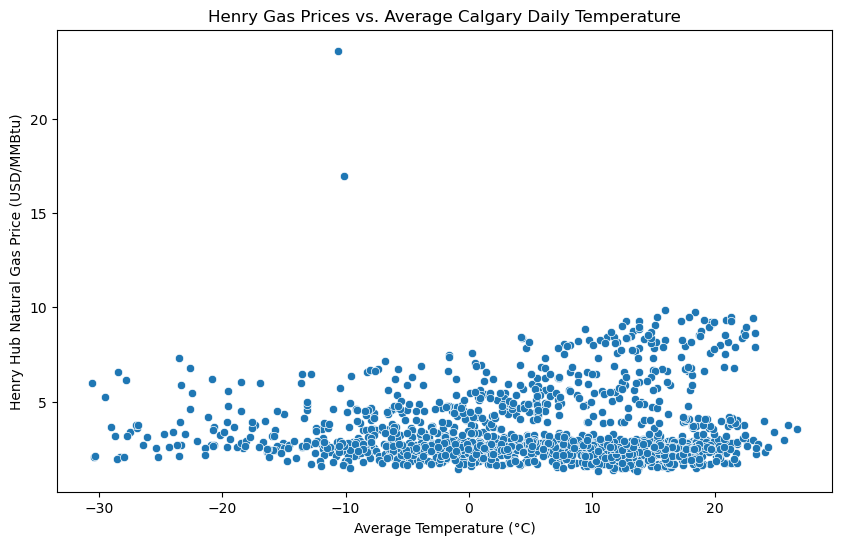

In [49]:
# Scatter plot of Gas Prices vs. Maximum Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Temp_C', y='Henry USD/MMBtu', data=new_price_df)
plt.title('Henry Gas Prices vs. Average Calgary Daily Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Henry Hub Natural Gas Price (USD/MMBtu)')
plt.show()


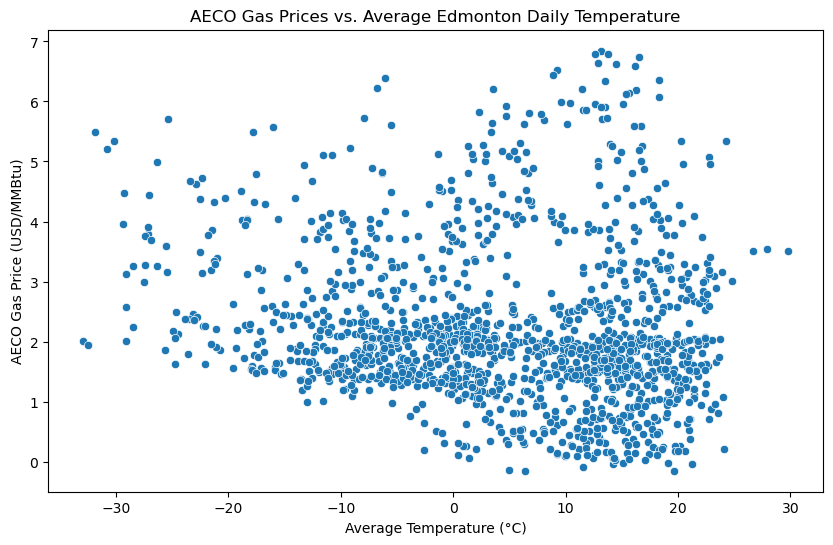

In [47]:
# Scatter plot of Gas Prices vs. Maximum Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Temp_C.1', y='AECO 5A USD/MMBtu', data=new_price_df)
plt.title('AECO Gas Prices vs. Average Edmonton Daily Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('AECO Gas Price (USD/MMBtu)')
plt.show()


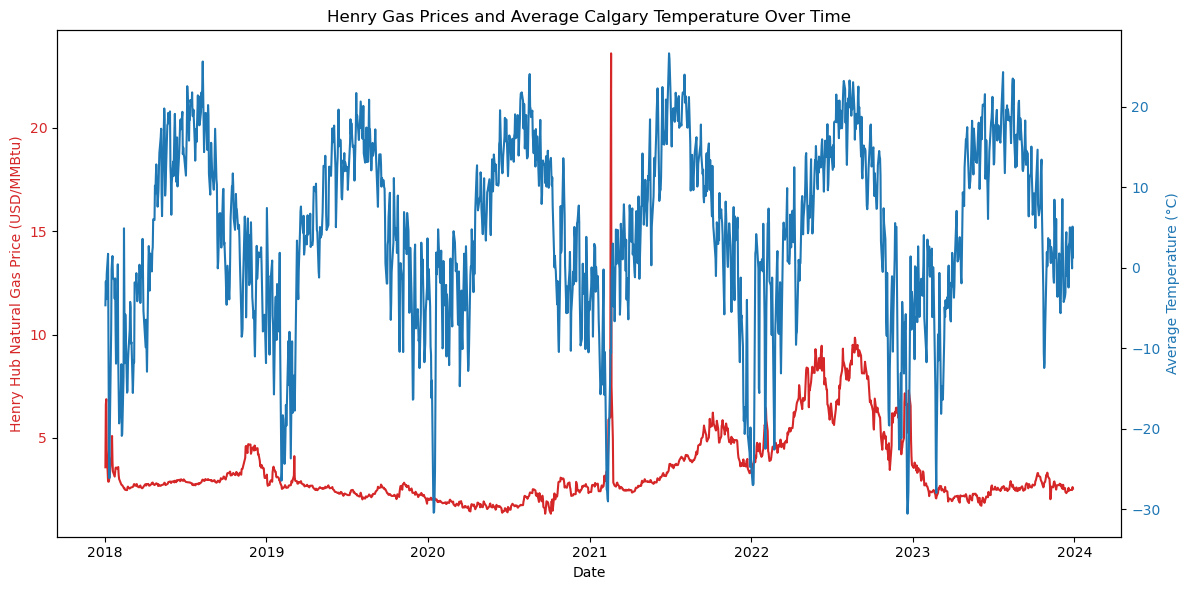

In [50]:
# Creating a secondary y-axis for temperature
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Gas Prices
ax1.set_xlabel('Date')
ax1.set_ylabel('Henry Hub Natural Gas Price (USD/MMBtu)', color='tab:red')
ax1.plot(new_price_df['Date'], new_price_df['Henry USD/MMBtu'], color='tab:red', label='Gas Price')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis for temperature
ax2 = ax1.twinx()  
ax2.set_ylabel('Average Temperature (°C)', color='tab:blue')  
ax2.plot(new_price_df['Date'], new_price_df['Avg_Temp_C'], color='tab:blue', label='Average Temp')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Henry Gas Prices and Average Calgary Temperature Over Time')
fig.tight_layout()
plt.show()


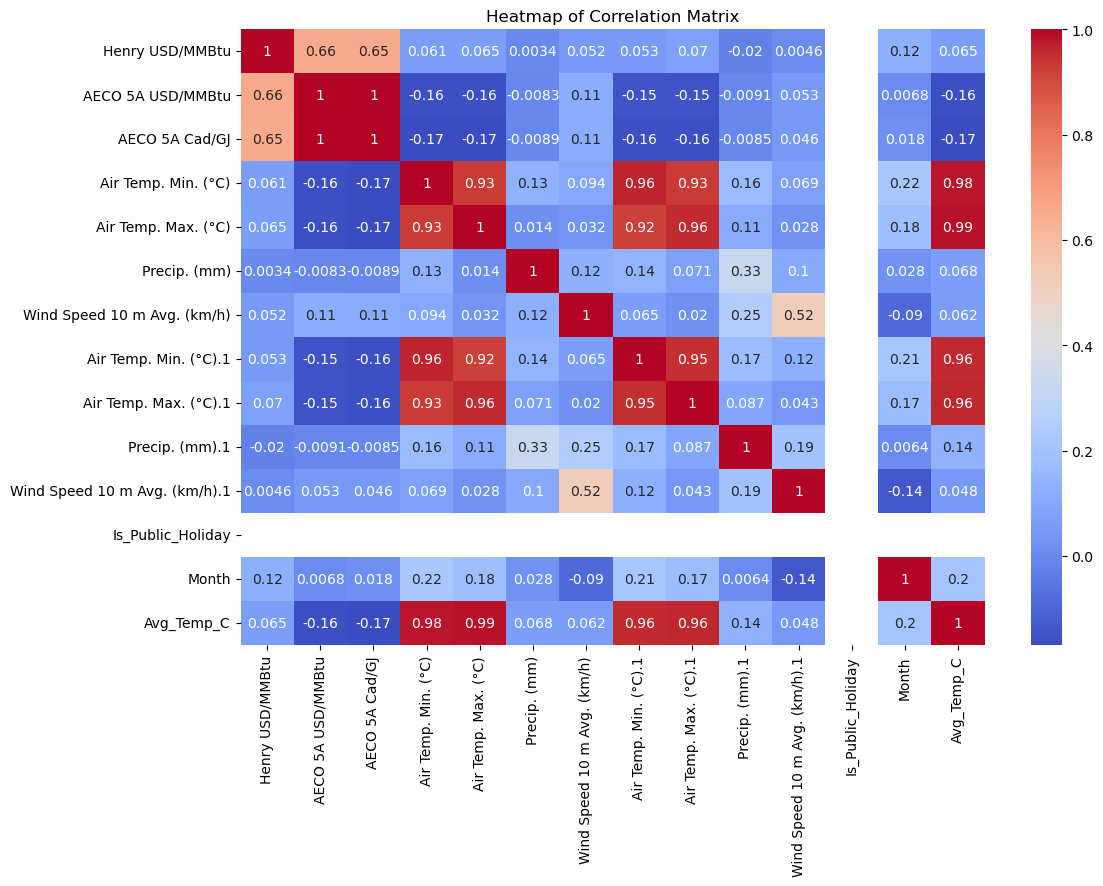

In [35]:
# Calculating the correlation matrix
corr_matrix = new_price_df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


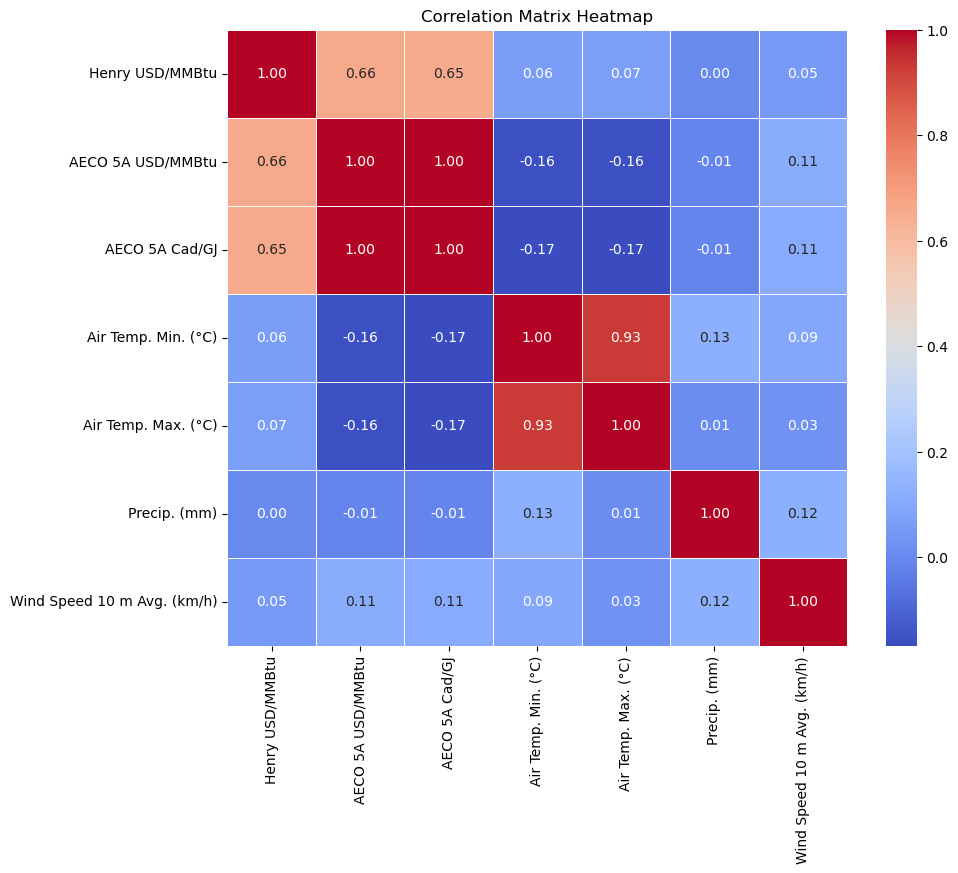

In [36]:
# Selecting relevant columns for correlation
columns_of_interest = ['Henry USD/MMBtu', 'AECO 5A USD/MMBtu', 'AECO 5A Cad/GJ','Air Temp. Min. (°C)', 'Air Temp. Max. (°C)', 'Precip. (mm)', 'Wind Speed 10 m Avg. (km/h)']
correlation_data = new_price_df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


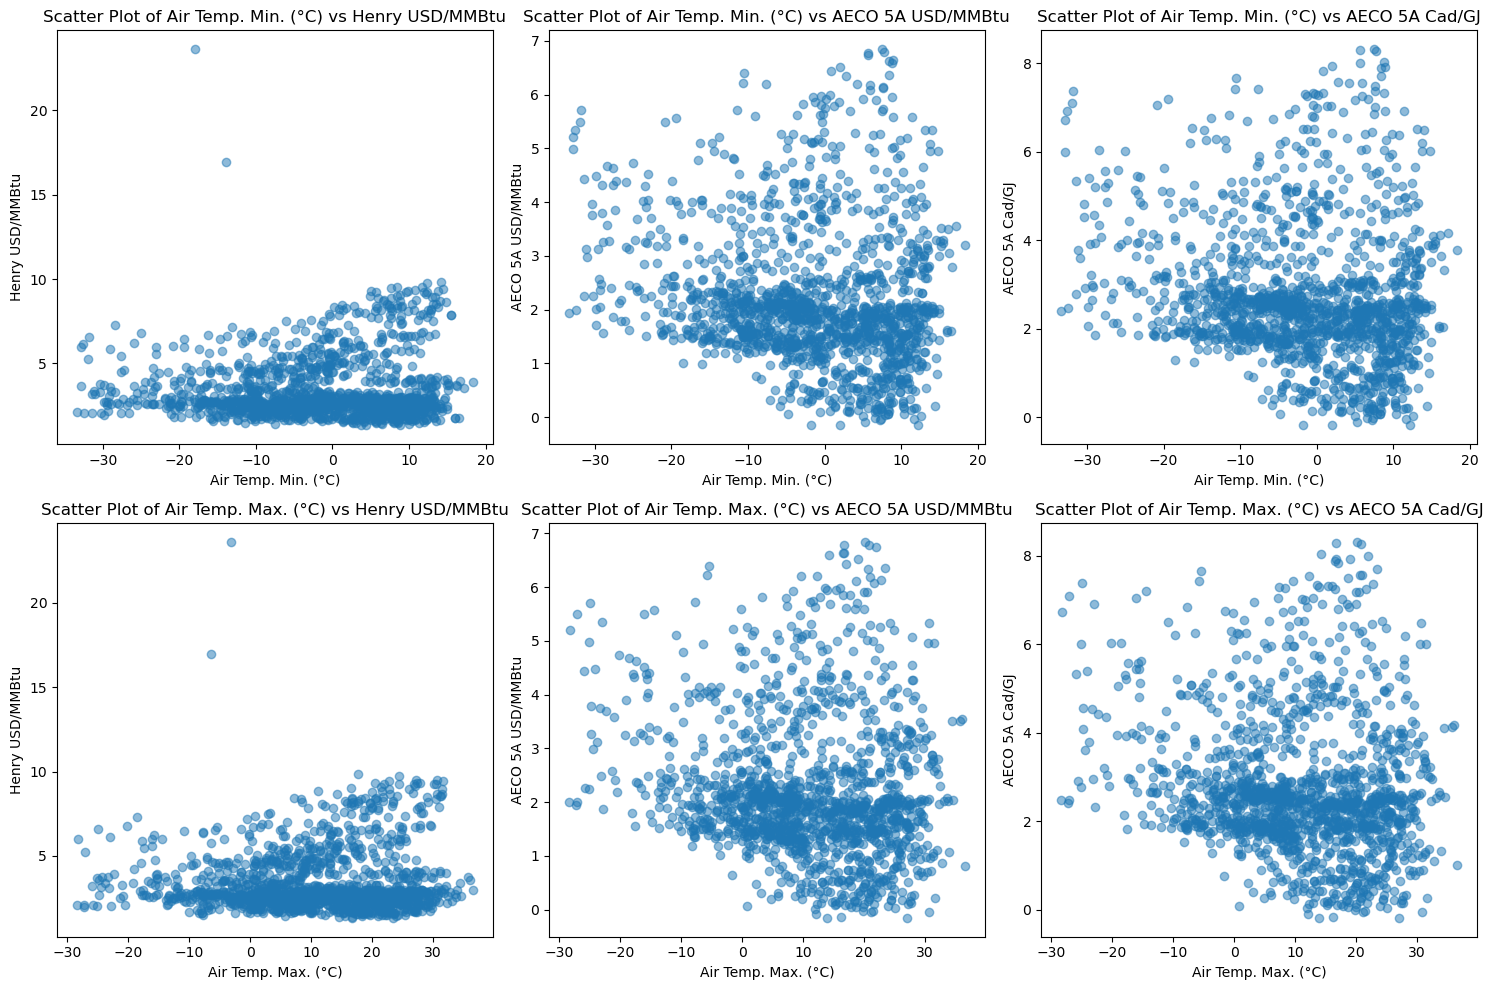

In [37]:
# Generating scatter plots for each pair of a weather variable and a gas price variable

# Selecting temperature columns and gas price columns separately
temperature_columns = ['Air Temp. Min. (°C)', 'Air Temp. Max. (°C)']
gas_price_columns = ['Henry USD/MMBtu', 'AECO 5A USD/MMBtu', 'AECO 5A Cad/GJ']

# Creating scatter plots
fig, axes = plt.subplots(len(temperature_columns), len(gas_price_columns), figsize=(15, 10))

for i, temp_col in enumerate(temperature_columns):
    for j, price_col in enumerate(gas_price_columns):
        axes[i, j].scatter(correlation_data[temp_col], correlation_data[price_col], alpha=0.5)
        axes[i, j].set_xlabel(temp_col)
        axes[i, j].set_ylabel(price_col)
        axes[i, j].set_title(f'Scatter Plot of {temp_col} vs {price_col}')

plt.tight_layout()
plt.show()


In [38]:
from sklearn.linear_model import LinearRegression